In [342]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import joblib

In [343]:
df = pd.read_csv("s3://german-credit-22/Datos/original/german_credit_data.csv")

In [344]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [345]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [347]:
df["Risk"].value_counts()/df["Risk"].count()

good    0.7
bad     0.3
Name: Risk, dtype: float64

In [348]:
train, test = train_test_split(df, test_size=0.3, random_state=42, stratify=df["Risk"])

In [349]:
train["Risk"].value_counts()/train["Risk"].count()

good    0.7
bad     0.3
Name: Risk, dtype: float64

In [350]:
test["Risk"].value_counts()/test["Risk"].count()

good    0.7
bad     0.3
Name: Risk, dtype: float64

In [351]:
train.to_csv("s3://german-credit-22/Datos/train/train.csv", index=False)

In [352]:
test.to_csv("s3://german-credit-22/Datos/test/test.csv", index=False)

## Exploracion de Dataset 

In [353]:
#pandas.get_dummies(train, prefix=None, prefix_sep=’_’, dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Job'}>,
        <AxesSubplot:title={'center':'Credit amount'}>],
       [<AxesSubplot:title={'center':'Duration'}>, <AxesSubplot:>]],
      dtype=object)

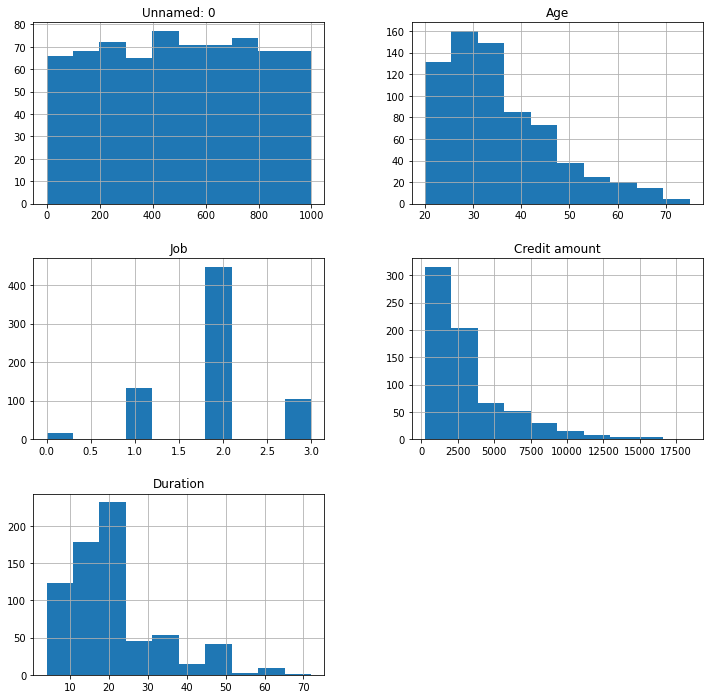

In [354]:
train.hist(figsize=(12, 12))

In [355]:
corr = train.corr()

<AxesSubplot:>

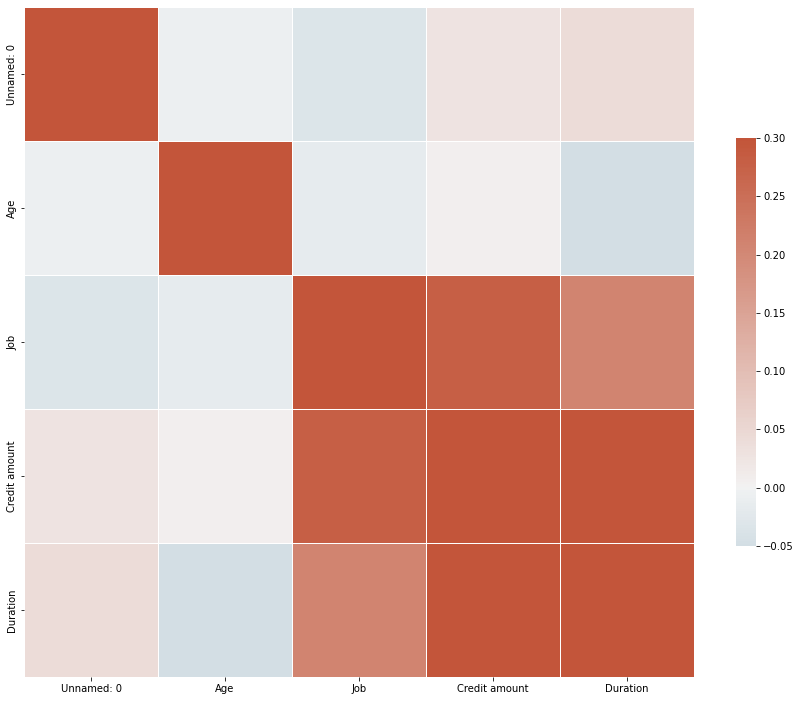

In [356]:
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [357]:
pd.crosstab(train["Housing"], train["Risk"], margins=True)

Risk,bad,good,All
Housing,,,
free,29,45,74
own,133,371,504
rent,48,74,122
All,210,490,700


In [358]:
tabla_sex = pd.crosstab(train["Sex"], train["Risk"], margins=True)
tabla_sex["probability"] = tabla_sex.iloc[:,1]/tabla_sex.iloc[:, 2]

In [359]:
tabla_sex

Risk,bad,good,All,probability
Sex,,,,
female,76,138,214,0.64486
male,134,352,486,0.72428
All,210,490,700,0.70000


## Preprocesamiento

In [360]:
from sklearn.impute import SimpleImputer

In [361]:
X_train_ini = train[["Age", "Credit amount", "Duration"]]

In [362]:
imputer = SimpleImputer(strategy='mean')

In [363]:
imputer.fit(X_train_ini)

SimpleImputer()

In [364]:
imputer.statistics_

array([  35.40285714, 3236.12142857,   21.04857143])

In [365]:
imputer.transform([[24, 1000, np.nan],
                   [np.nan, np.nan, 12]])

/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([[  24.        , 1000.        ,   21.04857143],
       [  35.40285714, 3236.12142857,   12.        ]])

In [366]:
imputer.fit_transform(X_train_ini)

array([[3.100e+01, 4.473e+03, 3.600e+01],
       [4.600e+01, 1.829e+03, 1.500e+01],
       [2.700e+01, 7.418e+03, 6.000e+01],
       ...,
       [6.300e+01, 1.655e+03, 1.200e+01],
       [4.900e+01, 2.096e+03, 1.200e+01],
       [3.700e+01, 3.676e+03, 6.000e+00]])

In [367]:
X_train_cat = train[["Saving accounts", "Checking account"]]

In [368]:
imputer = SimpleImputer(strategy='most_frequent')

In [369]:
#imputer.statistics_

In [370]:
X_train_cat = pd.DataFrame(imputer.fit_transform(X_train))

In [371]:
X_train_cat

,0,1,2,3,4,5
0,31,4473,36,male,radio/TV,own
1,46,1829,15,male,radio/TV,own
2,27,7418,60,male,radio/TV,own
3,27,1185,12,female,business,own
4,27,1237,6,female,radio/TV,own
...,...,...,...,...,...,...
695,41,5954,42,female,business,own
696,28,1887,18,male,business,own
697,63,1655,12,male,radio/TV,own
698,49,2096,12,male,education,own


## Ejemplo KNN Imputer

In [372]:
from sklearn.impute import KNNImputer
import math

In [373]:
df = pd.DataFrame([[40, 19, 3.0],
      [42, 20, 3.1],
      [44, 21, None],
      [45, 23, 4.1],
      [39, 25, 5.0],
      [80, 27, None],
      [82, 30, 4.8]      
     ], columns=["Peso", "Edad", "Nota"])

In [374]:
df

,Peso,Edad,Nota
0,40,19,3.0
1,42,20,3.1
2,44,21,NaN
3,45,23,4.1
4,39,25,5.0
5,80,27,NaN
6,82,30,4.8


In [375]:
imputer = KNNImputer(n_neighbors=1)

In [376]:
result = imputer.fit_transform(df)

In [377]:
result

array([[40. , 19. ,  3. ],
       [42. , 20. ,  3.1],
       [44. , 21. ,  4.1],
       [45. , 23. ,  4.1],
       [39. , 25. ,  5. ],
       [80. , 27. ,  4.8],
       [82. , 30. ,  4.8]])

In [378]:
def euclidean_distance(features_x, features_y):
    suma = 0
    for x, y in zip(features_x, features_y):
        suma += (x-y)**2
    return math.sqrt(suma)

## Escalado

### Escalado Estandar

In [379]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [380]:
train[["Age"]]

,Age
328,31
891,46
255,27
243,27
492,27
...,...
73,41
401,28
769,63
2,49


In [381]:
scaler = StandardScaler()

In [382]:
scaler.fit(train[["Age"]])

StandardScaler()

In [383]:
scaler.mean_

array([35.40285714])

In [384]:
scaler.var_**0.5

array([11.23479253])

In [385]:
age_scaled = scaler.transform(train[["Age"]])

In [386]:
age_scaled[:5]

array([[-0.39189483],
       [ 0.94324331],
       [-0.74793167],
       [-0.74793167],
       [-0.74793167]])

In [387]:
age_scaled.min()

-1.3709961351990447

In [388]:
age_scaled.max()

3.524510376131248

In [389]:
(train["Age"].iloc[0]-scaler.mean_) / (scaler.var_ ** 0.5)

array([-0.39189483])

In [390]:
scaler.inverse_transform([age_scaled[0]])

array([[31.]])

In [391]:
q1 = train["Age"].quantile(0.25)
q3 = train["Age"].quantile(0.75)
iqr = q3 - q1
median = train["Age"].median()

In [392]:
iqr

14.25

In [393]:
median

33.0

## Robust Scaler (manual)

In [394]:
def robust_scaler(x, median, iqr):
    result = x - median / iqr
    return result

In [395]:
age_robust_scaled = [robust_scaler(x, median, iqr) for x in train["Age"]]

## Valores Categóricos

In [396]:
from sklearn.preprocessing import OneHotEncoder

In [397]:
encoder = OneHotEncoder(sparse=True, drop='first')
encoder.fit_transform(train[["Sex"]])

<700x1 sparse matrix of type '<class 'numpy.float64'>'
	with 486 stored elements in Compressed Sparse Row format>

In [398]:
encoder.categories_

[array(['female', 'male'], dtype=object)]

In [399]:
encoder.inverse_transform([[0]])

array([['female']], dtype=object)

# Pipeline

In [400]:
from sklearn.pipeline import Pipeline

## Pipeline Numerico

In [401]:
numeric_pipeline = Pipeline(
    [
        ('Imputación con la media', SimpleImputer(strategy='mean')),
        ('Escalado minmax', MinMaxScaler())
    ]
)

In [402]:
numeric_pipeline.fit(train[['Age', 'Credit amount', 'Duration']])

Pipeline(steps=[('Imputación con la media', SimpleImputer()),
                ('Escalado minmax', MinMaxScaler())])

In [403]:
numeric_pipeline.transform(X_train_ini)

array([[0.2       , 0.23236492, 0.47058824],
       [0.47272727, 0.08688236, 0.16176471],
       [0.12727273, 0.3944096 , 0.82352941],
       ...,
       [0.78181818, 0.07730824, 0.11764706],
       [0.52727273, 0.10157368, 0.11764706],
       [0.30909091, 0.18851106, 0.02941176]])

In [404]:
numeric_pipeline.transform([[np.nan, np.nan, np.nan]])

/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([[0.28005195, 0.16430733, 0.25071429]])

## Pipeline Categorico

"Sex", "Purpose", "Housing" Imputacion con Moda y OneHotEncoder

In [405]:
categorical_pipeline = Pipeline(
    [
        ("Imputacion con la Moda", SimpleImputer(strategy='most_frequent')),
        ("Codificación OneHot", OneHotEncoder(sparse=False))
    ]
)

In [406]:
X_train_cateogorics = train[['Sex', 'Purpose', 'Housing']]

In [407]:
categorical_pipeline.fit(X_train_cateogorics)

Pipeline(steps=[('Imputacion con la Moda',
                 SimpleImputer(strategy='most_frequent')),
                ('Codificación OneHot', OneHotEncoder(sparse=False))])

In [408]:
encoded_x_train = categorical_pipeline.transform(X_train_cateogorics)

In [409]:
categorical_pipeline[1].categories_

[array(['female', 'male'], dtype=object),
 array(['business', 'car', 'domestic appliances', 'education',
        'furniture/equipment', 'radio/TV', 'repairs', 'vacation/others'],
       dtype=object),
 array(['free', 'own', 'rent'], dtype=object)]

In [410]:
encoded_x_train[0]

array([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.])

## Column Transformer

In [411]:
from sklearn.compose import ColumnTransformer

In [412]:
X_train_combined = train[['Age', 'Credit amount', 'Duration', 'Sex', 'Purpose', 'Housing']]

In [413]:
column_transformer = ColumnTransformer(
    [
        ("numeric_pipeline", numeric_pipeline, [0,1,2]),
        ("categorical_pipeline", categorical_pipeline, [3,4,5])
    ]
)

In [414]:
column_transformer.fit(X_train_combined)

ColumnTransformer(transformers=[('numeric_pipeline',
                                 Pipeline(steps=[('Imputación con la media',
                                                  SimpleImputer()),
                                                 ('Escalado minmax',
                                                  MinMaxScaler())]),
                                 [0, 1, 2]),
                                ('categorical_pipeline',
                                 Pipeline(steps=[('Imputacion con la Moda',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Codificación OneHot',
                                                  OneHotEncoder(sparse=False))]),
                                 [3, 4, 5])])

In [415]:
column_transformer.transform(X_train_combined)

array([[0.2       , 0.23236492, 0.47058824, ..., 0.        , 1.        ,
        0.        ],
       [0.47272727, 0.08688236, 0.16176471, ..., 0.        , 1.        ,
        0.        ],
       [0.12727273, 0.3944096 , 0.82352941, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.78181818, 0.07730824, 0.11764706, ..., 0.        , 1.        ,
        0.        ],
       [0.52727273, 0.10157368, 0.11764706, ..., 0.        , 1.        ,
        0.        ],
       [0.30909091, 0.18851106, 0.02941176, ..., 0.        , 0.        ,
        1.        ]])

# Exportar el transformer para producción

In [416]:
#joblib.dump(column_transformer, 'preprocessing.joblib')

# Evaluación de modelos con validación cruzada

In [417]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

### Version 1 - evaluar solo el modelo

In [418]:
X_train_ = train[['Age', 'Credit amount', 'Duration', 'Sex', 'Purpose', 'Housing']]

In [419]:
y_train = train["Risk"]

In [420]:
y_train

328    good
891    good
255    good
243    good
492    good
       ... 
73     good
401    good
769    good
2      good
617    good
Name: Risk, Length: 700, dtype: object

In [421]:
X_train_proccesed = column_transformer.transform(X_train)

In [422]:
y_train_transform = (y_train == 'good').astype("int")

In [423]:
2

2

In [424]:
results = cross_validate(DecisionTreeClassifier(),
                        X_train_proccesed, y_train_transform, cv=10,
                         scoring=["accuracy", "f1"]
                        )

In [425]:
print(results["test_accuracy"].mean(), "+-", results["test_accuracy"].std())

0.6285714285714284 +- 0.04237827706911807


### Version 2, modelo integrado al pipeline (mas recomendado que la version 1)

In [459]:
final_pipeline = Pipeline(
    [
        ("Pipeline de preprocesamiento", column_transformer),
        ("Modelo de predicción (Árbol)", DecisionTreeClassifier(max_depth=3))
    ]
)

In [474]:
final_results = cross_validate(
    final_pipeline, 
    X_train, 
    y_train_transform, 
    cv=10, 
    scoring=["accuracy", "f1"]
)

In [475]:
print(final_results["test_accuracy"].mean(), "+-", final_results["test_accuracy"].std())

0.7228571428571429 +- 0.014568627181693663


### Ajuste de Hiperparámetros

In [466]:
from sklearn.model_selection import GridSearchCV

In [467]:
grid = {'max_depth': [2,3,5,10]}

In [476]:
grid_search = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=grid,
    cv=10,
    scoring="accuracy"
)

In [477]:
grid_search.fit(X_train_proccesed, y_train_transform)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 5, 10]}, scoring='accuracy')

In [479]:
grid_search.best_params_

{'max_depth': 3}

In [478]:
grid_search.best_score_

0.7214285714285713

In [480]:
grid_search.scoring

'accuracy'